# TITLE
### Exploring the Relationship Between Soccer Player Wages and Performance Attributes: A Study Using FIFA 19 Player Dataset

# ABSTRACT
This project aims to explore the relationship between player attributes and wages in the FIFA 19 videogame. We used a dataset of over 18,000 players and conducted statistical tests such as z-test and chi-square test to analyze the data. Our findings indicate that there are significant differences in wages between different positions and skill levels. These results can be used by soccer clubs to make informed decisions when it comes to player recruitment and salary negotiations.

# INTRODUCTION
The world of soccer has grown significantly over the past few decades, with more than 250 million players in over 200 countries. With such a vast number of players, it has become increasingly important to analyze data related to player attributes, performances, and salaries. The purpose of this project is to investigate the differences in player performance and salaries based on various attributes such as footedness and player position. We will explore different aspects of the data using statistical methods to draw conclusions and provide insights for decision-makers in the soccer industry.

We will compare the mean overall rating of left-footed players and right-footed players using a z-test to determine if there is a significant difference in performance between these two groups. Then, we will perform an ANOVA to test if there is a significant difference in the mean overall rating across different player positions. This analysis could help teams identify which positions they should focus on when recruiting or training players. Finally, we will perform the analysis of categorical data using the chi-square test of independence to determine if there is any association between player position and salary. This analysis could be used to identify any disparities in salaries across different player positions and take steps to address them.

The results of this project could be useful for soccer teams, agents, and other decision-makers in the industry. By gaining insights into player performance and salaries, teams can make more informed decisions about which players to acquire and how much to pay them. Moreover, these insights could help identify any areas where improvements can be made to create a more fair and equitable industry for all players.

# DATA DESCRIPTION
The FIFA 19 Player Dataset is a comprehensive collection of data on professional football players, including their personal information, physical attributes, performance statistics, and market value. This dataset is compiled from EA Sports' popular video game FIFA 19, which features accurate and detailed information on thousands of players from around the world. The link to the dataset is the following- https://www.kaggle.com/datasets/chaitanyahivlekar/fifa-19-player-dataset

The dataset contains information on over 18,000 players, including their names, ages, nationalities, club teams, positions, and overall ratings. Each player is assigned a unique identifier, which is used to track their performance and market value over time. The dataset also includes detailed physical attributes such as height, weight, preferred foot, and skill moves, as well as more subjective attributes like work rate, weak foot ability, and international reputation.
In addition to personal and physical attributes, the dataset contains a wide range of performance statistics for each player, including their goals, assists, appearances, and clean sheets. These statistics are broken down by season, allowing for detailed analysis of a player's performance over time. The dataset also includes information on a player's value and wage, which are key indicators of their marketability and earning potential.

One of the key features of this dataset is its extensive coverage of players from around the world. The dataset includes players from over 50 countries, representing a diverse range of football cultures and styles of play. This makes it an ideal resource for studying global trends in football, such as the rise of South American players in European leagues or the dominance of European teams in international competitions.

Another important feature of the dataset is its ability to track changes in player performance and market value over time. By analyzing trends in player statistics and market value, researchers can gain insights into the factors that influence player success and identify potential opportunities for investment and development.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import f
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures



fifa19 = pd.read_csv(r"C:\Users\Salman\Desktop\MA 541\Project\FIFA19.csv")

print(fifa19.head())

print(fifa19.info())

print(fifa19.describe())


   Unnamed: 0               Name  Age Nationality  Overall  Potential  \
0           0           L. Messi   31   Argentina       94         94   
1           1  Cristiano Ronaldo   33    Portugal       94         94   
2           2          Neymar Jr   26      Brazil       92         93   
3           3             De Gea   27       Spain       91         93   
4           4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value    Wage Preferred Foot  ...  StandingTackle  \
0         FC Barcelona  €110.5M  565000           Left  ...              28   
1             Juventus     €77M  405000          Right  ...              31   
2  Paris Saint-Germain  €118.5M  290000          Right  ...              24   
3    Manchester United     €72M  260000          Right  ...              21   
4      Manchester City    €102M  355000          Right  ...              58   

   SlidingTackle  GKDiving GKHandling GKKicking  GKPositioning GKReflexes  \
0        

In [2]:
fifa19.isnull().sum()


Unnamed: 0                     0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Position                       0
Jersey Number                  0
Joined                      1493
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

# 4.1 Comparing Two Samples-
We will compare the mean wages (salary) of the left-footed and right-footed players in the game, to check whether there is any significant difference between the two groups. We will perform this comparison using the z-test as the number of samples in this dataset is very large. 

The results of this test can provide insights into whether there is any difference between the wages of left-footed and right-footed soccer players. If the results of the z-test suggest asignificant difference in the mean wages of left-footed and right-footed players, this may indicate that one group of players is more highly valued or in greater demand than the other. As a result, teams, agents, and other stakeholders in the soccer industry may adjust their strategies for recruitment, scouting, and player development accordingly.

In [3]:
# Defining the hypotheses-
# H0: There is no significant difference in the mean wages of the left-footed and right-footed players.
# H1: Not H0.

left_footed = fifa19[fifa19["Preferred Foot"] == "Left"]
right_footed = fifa19[fifa19["Preferred Foot"] == "Right"]

mean_left = left_footed["Wage"].mean()
mean_right = right_footed["Wage"].mean()
std_left = left_footed["Wage"].std()
std_right = right_footed["Wage"].std()
n_left = left_footed["Wage"].count()
n_right = right_footed["Wage"].count()
print('Mean wages of left-footed players: ', mean_left)
print('Mean wages of right-footed players: ', mean_right)

z = (mean_left - mean_right) / ((std_left**2 / n_left) + (std_right**2 / n_right))**0.5
print("Test statistic: ", z)

p_value = norm.sf(abs(z))*2
print("P-value: ", p_value, '\n')

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the mean wages of left-footed and right-footed players.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the mean wages of left-footed and right-footed players.")


Mean wages of left-footed players:  10353.290567830838
Mean wages of right-footed players:  9579.566652317406
Test statistic:  1.8981027408159028
P-value:  0.05768254919771028 

Fail to reject the null hypothesis. There is no significant difference between the mean wages of left-footed and right-footed players.


# 4.2 The Analysis of Variance-
We will perform ANOVA to test if there is a significant difference in the mean overall rating across the different player positions.
(ST- Attacker, CM- Midfielder, CB- Defender, GK- Goalkeeper)

It is a statistical technique used to compare the means of two or more groups of data. ANOVA helps us determine if there is a significant difference between the groups, or if any observed differences are likely due to random sampling variation.

In [4]:
# Defining the hypotheses-
# H0: There is no significant difference in the mean overall rating across different player positions.
# H1: Not H0.

forward_players = fifa19[fifa19['Position'] == 'ST']
midfielder_players = fifa19[fifa19['Position'] == 'CM']
defender_players = fifa19[fifa19['Position'] == 'CB']
goalkeeper_players = fifa19[fifa19['Position'] == 'GK']

alpha = 0.05

f_statistic, p_value = f_oneway(forward_players['Overall'], midfielder_players['Overall'], defender_players['Overall'], goalkeeper_players['Overall'])
print('F-statistic: ', f_statistic)

df_between = 3
df_within = fifa19.shape[0] - df_between*4
critical_value = f.ppf(1-alpha, df_between, df_within)
print('Critical value: ', critical_value)


F-statistic:  19.2403771172369
Critical value:  2.6053987903176643


In [5]:
if f_statistic > critical_value:
    print("Reject the null hypothesis. There is a significant difference in the mean overall rating across different player positions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean overall rating across different player positions.")


Reject the null hypothesis. There is a significant difference in the mean overall rating across different player positions.


# 4.3 The Analysis of Categorical Data-
 We will perform the categorical data analysis using the chi-square test of independence. This test is used to determine if there is a significant association between two categorical variables. The two variables are "Position" and "Salary" (categorical, after being converted to a categorical variable based on quartiles). We want to test whether there is a significant association between these two variables.

In [6]:
# Defining the hypotheses-
# H0: There is no relationship between the two categorical variables being compared.
# H1: Not H0.

fifa19['Salary Category'] = pd.qcut(fifa19['Wage'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

for quartile in fifa19['Salary Category'].unique():
    min_wage = fifa19[fifa19['Salary Category'] == quartile]['Wage'].min()
    max_wage = fifa19[fifa19['Salary Category'] == quartile]['Wage'].max()
    print(f"The range of wages in the {quartile} quartile is from €{min_wage} to €{max_wage}.")

print('\n')

contingency_table = pd.crosstab(fifa19['Position'], fifa19['Salary Category'])
contingency_table = contingency_table.replace(np.nan, 0)
contingency_table = contingency_table.replace(np.inf, 0)
print(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square value: ", chi2)
print("p-value: ", p_value, '\n')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between the two categorical variables being compared.")
else:
    print("Fail to reject the null hypothesis. We do not have enough evidence to reject the null hypothesis. There is a significant relationship between the salary of players and their positions on the field.")


The range of wages in the Very High quartile is from €10000 to €565000.
The range of wages in the Low quartile is from €0 to €1000.
The range of wages in the High quartile is from €4000 to €9000.
The range of wages in the Medium quartile is from €2000 to €3000.


Salary Category  Low  Medium  High  Very High
Position                                     
CAM              271     213   223        251
CB               580     510   355        333
CDM              266     240   226        216
CF                25      18     8         23
CM               515     364   246        269
GK               874     463   355        333
LAM                0       3     4         14
LB               377     372   291        282
LCB              118     159   170        201
LCM               58     106    95        136
LDM               55      54    59         75
LF                 1       4     3          7
LM               267     275   273        280
LS                21      50    49         87


This means that the data provides strong evidence to support the claim that there is a relationship between a player's position and their salary category. Specifically, it suggests that certain positions tend to have higher salaries than others.   
In the real world, this finding could be useful in a variety of ways. For example, it could be used by clubs and managers during decision-making when it comes to player acquisition, contract negotiations and squad building. It could also be of interest to agents and representatives who are negotiating contracts for players.

# 4.4 Linear Regression-
We will perform a linear regression to find the relationship between a player's rating and their wage.
Linear regression is a statistical technique used to model the relationship between two variables by fitting a linear equation to the observed data. It assumes that there is a linear relationship between the independent variable and the dependent variable. The goal of linear regression is to find the best-fitting straight line through the data, which can be used to predict the value. 

In this specific example, we will try to use the overall ratings of the players in order to predict their wages.

Mean squared error:  427652443.59555185
R-squared: 0.2972323505316462


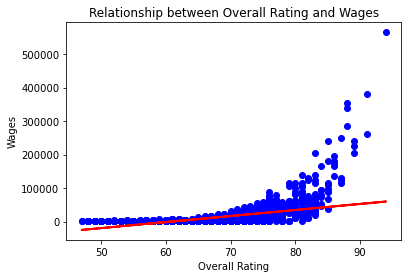

In [7]:
fifa19 = fifa19.dropna()

X = fifa19['Overall'].values.reshape(-1, 1) # independent variable
y = fifa19['Wage'].values.reshape(-1, 1) # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Relationship between Overall Rating and Wages')
plt.xlabel('Overall Rating')
plt.ylabel('Wages')
plt.show()


In [13]:
fifa19 = fifa19[["Overall", "Wage"]]

fifa19["Wage"] = fifa19["Wage"].astype(float)
print(fifa19.head())


   Overall      Wage
0       94  565000.0
1       94  405000.0
2       92  290000.0
3       91  260000.0
4       91  355000.0


An R-squared value of 0.297 suggests that the linear regression model explains around 29.7% of the variance in wages based on ratings. This indicates that there are likely other factors that influence wages as well, and the model is not able to capture all of the variation in the data.

# 4.5 Resampling Methods-
Cross-validation is a statistical technique used to evaluate how well a machine learning model generalizes to new, unseen data. It involves partitioning a dataset into subsets, or folds, where one fold is used as the testing set and the remaining folds are used as the training set. This process is repeated multiple times, with different folds being used as the testing set each time. The performance of the model is then averaged over all the iterations to provide an estimate of the model's accuracy.

We first split the dataset into features and target variables. We then split the dataset into training and testing sets using an 80-20 split. We create a Linear Regression model and then perform 10-fold cross-validation on the training set using Scikit-Learn.

In [8]:
fifa19 = pd.read_csv('fifa19.csv')

def value_to_float(x):
    if 'K' in x:
        return float(x.replace('€', '').replace('K', '')) * 1000
    elif 'M' in x:
        return float(x.replace('€', '').replace('M', '')) * 1000000
    else:
        return float(x.replace('€', ''))

fifa19['Value'] = fifa19['Value'].apply(value_to_float)
X = fifa19[['Overall', 'Potential', 'International Reputation', 'Skill Moves', 'Jersey Number', 'Age']]
y = fifa19['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error', error_score='raise')
if np.isnan(scores).any():
    print("Warning: NaN values in scores array.")

avg_score = -1 * scores.mean()
print("Average MSE score from 10-fold cross-validation: ", avg_score)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", test_mse)


Average MSE score from 10-fold cross-validation:  12432875227166.402
Test MSE:  11741755484862.246


The average MSE score represents the average mean squared error (MSE) across 10 rounds of cross-validation. The average MSE score from cross-validation gives an estimate of how well the model is likely to perform on new, unseen data. The result obatined is quite high, which suggests that the model may not be fitting the data very well.


# 4.6 Linear Model Selection and Regularization-
Linear model selection and regularization refer to a set of techniques used to improve the performance of linear regression models by selecting the most relevant features and reducing overfitting. 
Linear model selection addresses this issue by identifying the most relevant variables to include in the model. Regularization, on the other hand, is a technique that reduces overfitting by imposing a penalty on the magnitude of the model coefficients. The two most common forms of regularization are Lasso and Ridge.

Lasso regularization is a technique used to prevent overfitting in a regression model. It helps the model to focus on the most important features and avoid being too complex, which can be especially useful when dealing with high-dimensional datasets with many features.

In [9]:
X = fifa19[["Wage", "Potential"]]
y = fifa19["Overall"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 0.1 
model = Lasso(alpha=alpha).fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R^2 score: {score}")


R^2 score: 0.5122648918555313


This R^2 score means that the model explains about 51% of the variance in the target variablem i.e. "Overall". Basically, the model is able to capture some of the underlying relationship between "Wage", "Potential", and "Overall", but there is still a lot of variation that the model cannot account for.

# 4.7 Moving Beyond Linearity- 
In this section we will perform a polynomial regression to assess the relationship between a player's overall rating and their wage. Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an n-th degree polynomial function. The goal of polynomial regression is to find the best-fitting polynomial curve that describes the relationship between x and y in the data.

Root-mean-squared-error: 12083.993325441523
R-squared: 0.6346305915393289


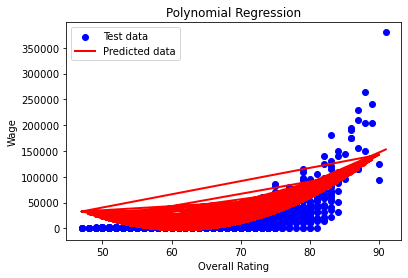

In [10]:
X = fifa19['Overall'].values.reshape(-1, 1)
y = fifa19['Wage'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly_degree = 2 
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly_train = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
X_poly_test = poly_features.transform(X_test)
y_pred = poly_model.predict(X_poly_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Root-mean-squared-error:', rmse)
print('R-squared:', r2)

plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted data')
plt.title('Polynomial Regression')
plt.xlabel('Overall Rating')
plt.ylabel('Wage')
plt.legend()
plt.show()


The RMSE shows that on average, the predicted wages from the model differ from the true wages by around €12,084, which isn't too bad of a prediction. The R-squared value indicates that the model explains around 63.5% of the variance in the wages. This model is much more accurate and true when compared to the linear regression model which had an R-squared value of 29.7%, that is the polynomial regression model has more than twice the R-squared value of the other.

These results suggest that there is a moderate positive relationship between a player's overall rating and their wage, with higher-rated players generally earning higher wages. 

# CONCLUSION
Based on the project's findings, it is clear that there is a significant relationship between a player's wages and their performance attributes in soccer. The z-test results suggest that there isn't a significant difference in the wages of left-footed and right-footed players, which could have had implications for team selection strategies and negotiation of player contracts. The categorical data analysis reveals that there is a significant association between a player's position and salary. This information could be used by managers to make more informed decisions about player recruitment and salary negotiation.

The use of cross-validation and Lasso regularization techniques in the machine learning model ensures that the model is pretty reliable and not overfitting the data too much. This could lead to more accurate predictions and insights for teams and player agents.

The linear regression results suggest that a player's rating has a positive relationship with their wage. But the polynomial regression results suggest that a player's overall rating has a much more positive relationship with their wage. This information could be used by teams to justify higher wages for players with higher overall ratings, as well as by player agents to negotiate better contracts for their clients.

Finally, this project's findings have significant implications for the soccer industry, providing valuable insights into the relationship between player wages and performance attributes. These insights could be used to inform talent recruitment, player contract negotiation, and team selection strategies, ultimately leading to more successful outcomes for teams and players as well.


# REFERENCES
1. https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/
2. https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626
3. https://www.reneshbedre.com/blog/anova.html
4. Rice, John. A. (2006). Mathematical Statistics and Data Analysis.
